# Exploration of k3d usage for discretisedfield visualisation

In [1]:
import k3d
import matplotlib
import numpy as np
import discretisedfield as df
%matplotlib inline

## Mesh and field objects to be visualised

Mesh has dimensions 10 x 6 x 4 to accommodate an ellipsoid

$$\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} <= 1$$

with: $a=5$, $b=3$, and $c=2$. The space is discretised into cells with dimensions $(1, 1, 1)$.

In [2]:
a, b, c = 5, 3, 2

mesh =  df.Mesh(p1=(-a, -b, -c), p2=(a, b, c), cell=(0.5, 0.5, 0.5))

We define the ellipsoid geometry by specifying the norm function, which returns 0 outside the sample.

In [3]:
def norm_fun(pos):
    x, y, z = pos
    if (x/a)**2 + (y/b)**2 + (z/c)**2 <= 1:
        return 0.5
    else:
        return 0
    
def value_fun(pos):
    x, y, z = pos
    if x >= 0:
        return (x*y*z, x*z, y*z)
    else:
        return (1, 1, 1)

field = df.Field(mesh, value=value_fun, norm=norm_fun)

### The plot of a slice in the $x$ direction:

Output()

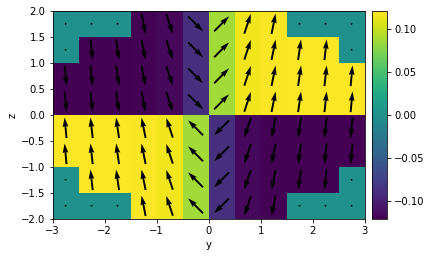

In [54]:
import pylab
def colormap(name, n=256):
    """Returns a list of tuple (r, g, b) colors."""
    cmap = pylab.cm.get_cmap(name, n)
    cmap_list = []
    for i in range(cmap.N):
        cmap_list.append(cmap(i)[:3])

    return np.array(cmap_list)

def get_int_component(field_component):
    max_value = np.nanmax(field_component)
    min_value = np.nanmin(field_component)
    value_range = max_value - min_value

    nx, ny, nz = field_component.shape

    # Put values in 0-255 range
    if value_range != 0:
        int_component = (field_component + abs(min_value)) / value_range * 254
        int_component += 30
    else:
        int_component = 128 * np.ones(field_component.shape)  # place in the middle of colormap

    for i in range(nx):
        for j in range(ny):
            for k in range(nz):
                if np.isnan(field_component[i, j, k]):
                    int_component[i, j, k] = 0
                else:
                    int_component[i, j, k] = int(int_component[i, j, k])
    
    
    return int_component


field_array = field.array.copy()
nx, ny, nz, _ = field.array.shape

# chose x,y,z plane and component {1, 2, 3}
data = [(i[0], i[1][0]) for i in field.plane(x=0)] 
coord, value = zip(*data)
coord, value = np.array(coord), np.array(value)

# reshape by chosed plane
value = value.reshape(1, ny, nz)
value[value == 0] = 'nan'
#print(value)

# return integer value in range 0-255
value = get_int_component(value)
#print(value)

# swap z <--> x axis
value = np.swapaxes(value, 0, 2)
#print(value.shape)
value = value.astype(np.uint8)
#print(value)

# colors (gray, viridis)
cmap = colormap('gray', 256)
colors = cmap[value]
#print(colors)
dim = np.prod(np.array(colors.shape[:-1]))
colors = colors.reshape((dim, 3))
colors = ['0x{}'.format(matplotlib.colors.rgb2hex(rgb)[1:]) for rgb in colors]
colors = [int(i, 16) for i in colors]

# TODO change boundary by selected plane
xmin,ymin,zmin = field.mesh.pmin
xmax,ymax,zmax = field.mesh.pmax
xmin=-0.1; xmax=0.1

plot = k3d.plot()
plt_vox = k3d.voxels(value,
                     color_map=colors,
                     xmin=xmin,xmax=xmax,
                     ymin=ymin,ymax=ymax,
                     zmin=zmin,zmax=zmax,
                     outlines=False)

plot += plt_vox
plot.display()

field.plot_plane(x=0)

# Simple example

In [70]:
value = [0, 1, 2, 3, 2, 1, 0,
         1, 2, 3, 4, 3, 2, 1,
         2, 3, 4, 5, 4, 3, 2,
         3, 4, 5, 6, 5, 4, 3,
         2, 3, 4, 5, 4, 3, 2,
         1, 2, 3, 4, 3, 2, 1,
         0, 1, 2, 3, 2, 1, 0
        ]
value = np.array(value)
value = value.reshape((1, 7, 7))
value = value * 1

xmin = -1; xmax = +1
ymin = -1; ymax = +1
zmin = -0.1; zmax = +0.1

cmap = colormap('viridis', 256)

colors = cmap[value]
#print(colors)
dim = np.prod(np.array(colors.shape[:-1]))
colors = colors.reshape((dim, 3))
colors = ['0x{}'.format(matplotlib.colors.rgb2hex(rgb)[1:]) for rgb in colors]
colors = [int(i, 16) for i in colors]
#print(colors)

plot = k3d.plot()
plt_vox = k3d.voxels((value).astype(np.uint8),
                     #color_map=colors,
                     xmin=xmin,xmax=xmax,
                     ymin=ymin,ymax=ymax,
                     zmin=zmin,zmax=zmax,
                     outlines=False)

plot += plt_vox
plot.display()
value

Output()

array([[[0, 1, 2, 3, 2, 1, 0],
        [1, 2, 3, 4, 3, 2, 1],
        [2, 3, 4, 5, 4, 3, 2],
        [3, 4, 5, 6, 5, 4, 3],
        [2, 3, 4, 5, 4, 3, 2],
        [1, 2, 3, 4, 3, 2, 1],
        [0, 1, 2, 3, 2, 1, 0]]])